In [1]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [ ]:
!pip install --upgrade keras

In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
import seaborn as sns
from keras.optimizers import Adam
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
import numpy as np
import os
import pandas as pd
import re
import sklearn
import string
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Data Processing and Cleaning

In [ ]:
def remove_numbers_iterative(input_string):
    # Iterate through each character and filter out numeric characters
    return ''.join(char for char in input_string if not char.isdigit())

In [ ]:
def read_cha_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

def process_directory(directory_path):
    data = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.cha'):
            file_path = os.path.join(directory_path, file_name)
            cha_lines = read_cha_file(file_path)
            appended_string = ""
            gender = ""
            for line in cha_lines:
                if "|male|" in line:
                    gender = "male"
                if "|female|" in line:
                    gender = "female"
                if line.startswith('*PAR'):
                    #appended_string += line
                    line = line[len('*PAR:'):].strip()
                    line = line[len('par'):].strip()
                    line = line[len('.'):].strip()
                    line = remove_numbers_iterative(line)
                    appended_string += line
            data.append({'filename': file_name, 'Transcripts': appended_string, 'gender': gender, 'AD': 1})
#             print(file_name)
#             print(appended_string)
    df = pd.DataFrame(data)
    return df

# Example usage
directory_path = '/content/gdrive/MyDrive/PittTest/Pitt/Dementia/cookie/'
df_dementia = process_directory(directory_path)

# Printing the DataFrame
#print(df)
df_dementia.head()

,filename,Transcripts,gender,AD
0,350-0.cha,washin(g) dishes . [+ gram] _e that . [+ exc...,female,1
1,474-0.cha,"‡ your sink is being run over, the water . _...",male,1
2,657-0.cha,‡ she's washin(g) dishes . _climbin(g) up to...,male,1
3,270-2.cha,[+ exc] _‡ let's see . [+ exc] _ooks like ...,female,1
4,704-0.cha,‡ the little kid's falling off his chair [: st...,male,1


In [ ]:
import os
import pandas as pd

def read_cha_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

def process_directory(directory_path):
    data = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.cha'):
            file_path = os.path.join(directory_path, file_name)
            cha_lines = read_cha_file(file_path)
            appended_string = ""
            gender = ""
            for line in cha_lines:
                if "|male|" in line:
                    gender = "male"
                if "|female|" in line:
                    gender = "female"
                if line.startswith('*PAR'):
                    #appended_string += line
                    line = line[len('*PAR:'):].strip()
                    line = line[len('par'):].strip()
                    line = line[len('.'):].strip()
                    line = remove_numbers_iterative(line)
                    appended_string += line
            data.append({'filename': file_name, 'Transcripts': appended_string, 'gender': gender, 'AD': 0})
#             print(file_name)
#             print(appended_string)
    df = pd.DataFrame(data)
    return df

# Example usage
directory_path = '/content/gdrive/MyDrive/PittTest/Pitt/Control/cookie/'
df_control = process_directory(directory_path)

# Printing the DataFrame
#print(df)
df_control.head()

,filename,Transcripts,gender,AD
0,275-1.cha,the boy is taking cookies out_of the cookie ja...,female,0
1,229-1.cha,. [+ exc] _e's a child reaching for a cookie...,male,0
2,322-2.cha,. [+ exc] _oy is taking cookies out_of a clo...,male,0
3,196-1.cha,[+ exc] _ghs the little boy is reaching for ...,male,0
4,092-2.cha,oy is &-uh tipping stool reaching for the cook...,female,0


In [ ]:
pd.set_option('display.max_colwidth', None)
df = pd.concat([df_dementia, df_control], ignore_index=True)

In [ ]:
table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
string_punctuation_1 = string.punctuation.replace(".","").replace("`","").replace("'","")
table_ = str.maketrans(string_punctuation_1, ' '*len(string_punctuation_1))
printable = set(string.printable)


def clean_data(text):

    sentence = text.lower()
    sentence_no_punct = sentence.translate(table_)
    space_remove = re.sub('\s+',' ', sentence_no_punct)
    return space_remove

In [ ]:
df['Transcripts_Cleaned'] = df['Transcripts'].apply(lambda row: clean_data(row) )

In [ ]:
#df['Transcripts_Cleaned']
df = df.drop(columns=['filename'])
df = df.drop(columns=['gender'])
df.head()

,Transcripts,AD,Transcripts_Cleaned
0,"washin(g) dishes . [+ gram] _e that . [+ exc] _what [//] the boy's putting up the cookie jar or gettingis little sister is begging him +""/. _h hurry up . _ome on . _e's got the foot stool . _is [//] her (..) big sister is washing the dishes . _'s the big sister or the mama <I don't know which that is> [//]s got the spigot on and the water's running . _here's her (.) cup . _asn't them put up yet . _e's up on the foot stoo(l) . _e's got the cookie jars . _gettin(g) the cookie jars . _s beggin(g) him for some . _in(g) him for some cookies . [+ gram] _she's washing the dishes> [//] &-uh she's drying the dishes . _he's got the water on in the sink . _nd there's her cup sitting down there +/. _o be washed . _he has an apron on (..) and her shoes . _he drapes are pulled back in one of the rooms . _[+ exc] _",1,washin g dishes . gram  e that . exc  what the boy's putting up the cookie jar or gettingis little sister is begging him .  h hurry up .  ome on .  e's got the foot stool .  is her .. big sister is washing the dishes .  's the big sister or the mama i don't know which that is s got the spigot on and the water's running .  here's her . cup .  asn't them put up yet .  e's up on the foot stoo l .  e's got the cookie jars .  gettin g the cookie jars .  s beggin g him for some .  in g him for some cookies . gram  she's washing the dishes uh she's drying the dishes .  he's got the water on in the sink .  nd there's her cup sitting down there .  o be washed .  he has an apron on .. and her shoes .  he drapes are pulled back in one of the rooms .   exc  
1,"‡ your sink is being run over, the water . _tool the kid's standing on is falling . _e's getting cookies from a jar . _ady's washin(g) dishes . _irl's reachin(g) for a cookie . _d there be more ? [+ exc] _n't think so . [+ exc] _",1,‡ your sink is being run over the water .  tool the kid's standing on is falling .  e's getting cookies from a jar .  ady's washin g dishes .  irl's reachin g for a cookie .  d there be more exc  n't think so . exc  
2,‡ she's washin(g) dishes . _climbin(g) up to get cookies . _gonna fall . _he's laughin(g) . _he's spill [//] runnin(g) the water over . _looks like someone down out there or somethin(g) . [+ es] _n't know what that is . [+ exc] _,1,‡ she's washin g dishes .  climbin g up to get cookies .  gonna fall .  he's laughin g .  he's spill runnin g the water over .  looks like someone down out there or somethin g . es  n't know what that is . exc  
3,[+ exc] _‡ let's see . [+ exc] _ooks like a woman . _sume she's drying a dish . _gh there's a window open in the kitchen . _s a kitchen . _gh there is a child reaching for a cookie from the cookie jar .-uh ladder [: stool] [* s:r] that he's standing on ise's a little girl in [/] in the house . _ooks like mother has something fixed for dinner <I guess iter that or the dishes she's dried . [+ gram] _ot sure . [+ exc] _e's water running over the sink . _(..) I guess that's about it . [+ exc] _,1,exc  ‡ let's see . exc  ooks like a woman .  sume she's drying a dish .  gh there's a window open in the kitchen .  s a kitchen .  gh there is a child reaching for a cookie from the cookie jar . uh ladder stool s r that he's standing on ise's a little girl in in the house .  ooks like mother has something fixed for dinner i guess iter that or the dishes she's dried . gram  ot sure . exc  e's water running over the sink .   .. i guess that's about it . exc  
4,‡ the little kid's falling off his chair [: stool] [* s:r] . _he mother is having water run over the &-uh sink . _‡ the water's running on the floor +/. _nder her feet . _ooking outside but that yard is okay . _indows are open . _ittle girl is laughing at the boy falling off the chair[//] that's bad &=laughs . [+ exc] _,1

Class 0 samples:  243
Class 1 samples:  306


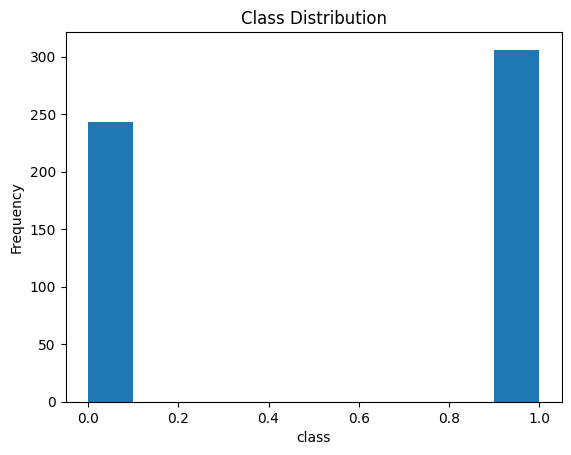

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

counts, bins = np.histogram(df['AD'])
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Class Distribution")
plt.xlabel('class')
plt.ylabel('Frequency')
print("Class 0 samples: ",len(df[df['AD']==0]))
print("Class 1 samples: ",len(df[df['AD']==1]))
plt.show()

# **Neural Network Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout,Conv1D, Flatten, MaxPooling1D, Dense, LSTM,Conv1D,MaxPooling1D, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.constraints import max_norm
from keras.preprocessing import sequence
from keras.callbacks import History
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Splitting data

X_seq_train, X_seq_test, y_seq_train, y_seq_test = train_test_split(df['Transcripts_Cleaned'], df['AD'], test_size = 0.1, random_state = 0)

In [ ]:
#Tokenizing sentences

tokenizer = Tokenizer(num_words = 2500)
tokenizer.fit_on_texts(X_seq_train)

Xwords_train = tokenizer.texts_to_sequences(X_seq_train)
Xwords_test = tokenizer.texts_to_sequences(X_seq_test)

print(tokenizer)

In [ ]:
#Padding the sentence sequences

max_review_length = 100
Xwords_train = sequence.pad_sequences(Xwords_train, maxlen=max_review_length)
Xwords_test = sequence.pad_sequences(Xwords_test, maxlen=max_review_length)

In [ ]:
print(Xwords_train.shape)
print(Xwords_test.shape)
print(y_seq_train.shape)
print(y_seq_test.shape)

(494, 100)
(55, 100)
(494,)
(55,)


In [ ]:
vocab = len(tokenizer.word_index) + 1   # Add one for the zero indexing
vocab

3129

In [ ]:
history = History()

In [ ]:

# model = Sequential()
# model.add(Embedding(input_dim = vocab, output_dim = 100, input_length=100))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

# model.fit(Xwords_train, y_seq_train, epochs=100, batch_size=32,verbose = 1,callbacks = [history],validation_split=0.1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
import numpy as np

vocab = 10000  # Replace with your vocabulary size
sequence_length = 100  # Replace with your sequence length
num_classes = 1

# Create a sequential model
model = Sequential()

# Add an embedding layer
model.add(Embedding(input_dim=vocab, output_dim=100, input_length=sequence_length))

# Flatten the embedding output
model.add(Flatten())

# Add dense layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1320705 (5.04 MB)
Trainable params: 132070

In [ ]:
history = model.fit(
    Xwords_train, y_seq_train,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_split=0.1
)

loss, accuracy = model.evaluate(Xwords_test, y_seq_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/100
14/14 [==============================] - 5s 138ms/step - loss: 0.6879 - accuracy: 0.5428 - val_loss: 0.6725 - val_accuracy: 0.5600
Epoch 2/100
14/14 [==============================] - 1s 56ms/step - loss: 0.6222 - accuracy: 0.6937 - val_loss: 0.6602 - val_accuracy: 0.5600
Epoch 3/100
14/14 [==============================] - 1s 67ms/step - loss: 0.4581 - accuracy: 0.9144 - val_loss: 0.6527 - val_accuracy: 0.6200
Epoch 4/100
14/14 [==============================] - 1s 60ms/step - loss: 0.2002 - accuracy: 0.9865 - val_loss: 0.6071 - val_accuracy: 0.7000
Epoch 5/100
14/14 [==============================] - 1s 69ms/step - loss: 0.0443 - accuracy: 0.9977 - val_loss: 0.6320 - val_accuracy: 0.6600
Epoch 6/100
14/14 [==============================] - 1s 55ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.7254 - val_accuracy: 0.6800
Epoch 7/100
14/14 [==============================] - 1s 57ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.7232 - val_accuracy: 0.6600
Epoch

In [ ]:
#evaluating model on test data

eval_list = model.evaluate(Xwords_test,y_seq_test)
print('Test Loss: ',eval_list[0])
print('Test Accuracy: ',eval_list[1])

2/2 [==============================] - 0s 12ms/step - loss: 1.2473 - accuracy: 0.7091
Test Loss:  1.2472842931747437
Test Accuracy:  0.7090908885002136


2/2 [==============================] - 0s 13ms/step


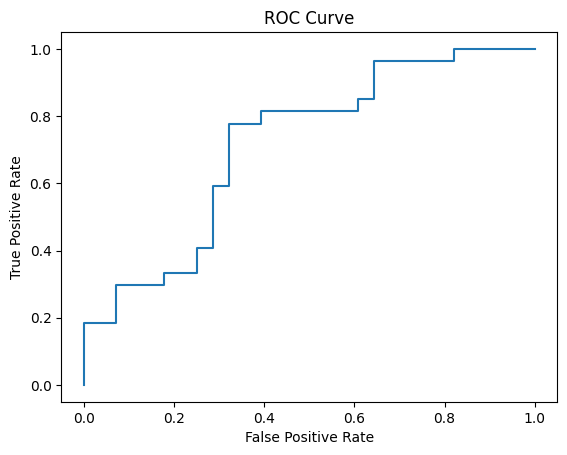

In [ ]:
from sklearn.metrics import roc_curve
y_pred_probas = model.predict(Xwords_test)
y_pred_probas = [i[0] for i in y_pred_probas]
fpr, tpr, thresholds = roc_curve(y_seq_test, y_pred_probas)
#roc_auc = roc_auc_score(y_test, scores)
plt.plot(fpr, tpr)

plt.title("ROC Curve")

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.show()

In [ ]:
#predicting classes on test data
y_pred_probs = model.predict(Xwords_test)
y_pred_classes = y_pred_probs.argmax(axis=-1)
print(confusion_matrix(y_seq_test, y_pred_classes))
# y_pred = model.predict_classes(Xwords_test)
# y_pred = [i[0] for i in y_pred]
# print(confusion_matrix(y_seq_test, y_pred))
# print(classification_report(y_seq_test,y_pred))

2/2 [==============================] - 0s 6ms/step
[[28  0]
 [27  0]]


In [ ]:
import pickle
tokenizer_filename = '/content/gdrive/MyDrive/DementiaDetection/tokenizer.pkl'
with open(tokenizer_filename, 'wb') as file:
    pickle.dump(tokenizer, file)

# Load the fitted tokenizer using pickle
with open(tokenizer_filename, 'rb') as file:
    loaded_tokenizer = pickle.load(file)

In [ ]:
# Save the model
model.save('/content/gdrive/MyDrive/DementiaDetection/alzheimer_detection_nnmodel.h5')

In [ ]:
predictions = model.predict(Xwords_test)

threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

correctly_classified_indices = np.where(predicted_labels.squeeze() == y_seq_test.values)[0]

correctly_classified_samples = Xwords_test[correctly_classified_indices]
correctly_classified_labels = y_seq_test.iloc[correctly_classified_indices]

for sample, label, outcome in zip(correctly_classified_samples, correctly_classified_labels, predicted_labels[correctly_classified_indices]):
    print(f"Input Data: {sample.tolist()}, Label: {label}, Predicted Outcome: {outcome[0]}")

2/2 [==============================] - 0s 11ms/step
Input Data: [20, 118, 493, 4, 1, 126, 15, 370, 4, 1, 71, 11, 18, 3, 54, 1, 541, 142, 3, 54, 1, 1, 192, 192, 2, 28, 30, 42, 84, 617, 233, 8, 371, 23, 517, 35, 507, 3, 66, 150, 35, 70, 1, 1, 15, 292, 398, 372, 21, 66, 75, 3, 460, 38, 4, 1, 298, 2, 28, 29, 99, 53, 67, 3, 357, 84, 101, 463, 66, 23, 3, 4, 1, 539, 4, 327, 79, 10, 2, 20, 3, 42, 617, 2071, 124, 120, 96, 9, 27, 362, 41, 118, 220, 26, 474, 35, 643, 70, 1, 1], Label: 1, Predicted Outcome: 1
Input Data: [29, 259, 36, 1, 1, 7, 2, 448, 32, 223, 30, 3, 72, 9, 1343, 213, 297, 31, 1, 165, 64, 3, 4, 1, 1300, 67, 3, 87, 371, 5, 771, 2187, 62, 1, 283, 30, 1, 626, 136, 80, 4, 1, 71, 11, 18, 3, 87, 65, 1, 176, 28, 30, 92, 114, 18, 1, 16, 201, 3, 318, 139, 6, 23, 94, 324, 6, 215, 4, 1, 354, 34, 12, 130, 759, 24, 1, 254, 8, 8, 8, 238, 1, 925, 41, 3, 36, 40, 2, 129, 114, 1, 279, 52, 44, 15, 97, 27, 4, 1, 1], Label: 1, Predicted Outcome: 1
Input Data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 246, 

In [ ]:
import numpy as np

# Preprocess the new transcript
#new_transcript = 'hello hello'
#new_transcript = 'washing dishes getting cookies out of cookie jar stool tipping over water running out of sink Girl reaching for cookie'
new_transcript = "A young boy is reaching for the cookie jar. He is standing on a stool and is almost falling over. His sister is standing beside him and talking to him. On the other side of the kitchen their mom is wiping dishes. The water from the faucet is running over on to the floor."
#new_transcript = "washin g dishes . gram e that . excwhat the boy's putting up the cookie jar or gettingis little sister is begging him .h hurry up . ome on . e's got the foot stool .is her .. big sister is washing the dishes .'s the big sister or the mama i don't know which that is s got the spigot on and the water's running . here's her . cup . asn't them put up yet . e's up on the foot stoo l . e's got the cookie jars . gettin g the cookie jars . s beggin g him for some .in g him for some cookies . gram she's washing the dishes uh she's drying the dishes .he's got the water on in the sink . nd there's her cup sitting down there .o be washed .he has an apron on .. and her shoes .he drapes are pulled back in one of the rooms ."
#new_transcript = "the boy is taking cookies out of the cookie jar .irl's reaching for them . s apparently telling him to be quiet . falling off the stool . mom's washin g dishes while the water runs laughs out overlooks like the curtain might be blowing a little bit there .  . and she's stepping out of the puddle .  .. i guess that's about it"
#new_transcript = "Test"
#new_transcript = 'washing dishes getting cookies out of cookie ja stool tipping ove water running out of sink Girl reaching for cookie'
new_transcript_seq = tokenizer.texts_to_sequences([new_transcript])
new_transcript_padded = sequence.pad_sequences(new_transcript_seq, maxlen=max_review_length)
# test = tokenizer.texts_to_sequences(new_transcript)
# new_transcript_padded = sequence.pad_sequences(test, maxlen=max_review_length)
print(new_transcript_padded.tolist())
print(len(new_transcript_padded.tolist()))
# Predict using the trained model
predicted_prob = model.predict(new_transcript_padded)[0][0]

# Classify based on probability threshold (you can adjust this threshold as needed)
threshold = 0.95
if predicted_prob >= threshold:
    classification = 'AD'
else:
    classification = 'Non-AD'

print('Predicted Probability:', predicted_prob)
print('Classification:', classification)


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 303, 29, 3, 59, 33, 2, 11, 18, 67, 3, 61, 8, 5, 20, 10, 3, 340, 73, 19, 47, 109, 3, 61, 521, 82, 10, 608, 9, 82, 8, 2, 168, 241, 17, 2, 112, 319, 390, 3, 157, 14, 2, 24, 94, 2, 304, 3, 56, 19, 8, 9, 2, 46]]
1
1/1 [==============================] - 0s 57ms/step
Predicted Probability: 0.88823366
Classification: Non-AD
